In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/AcademicPerformance_New.csv')

In [3]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [4]:
df.tail()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes
98,99.0,India,58.0,67.0,NaN,41.666667,B,No


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [6]:

df['WT'] = df['WT'].fillna(df['WT'].mean())
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())
df['AI'] = df['AI'].fillna(df['DSBDA'].mean())

In [7]:
df.dropna(subset=['Roll No'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           98 non-null     float64
 3   DSBDA        98 non-null     float64
 4   AI           98 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.9+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Roll No'].astype(int)

0      1
1      2
3      4
4      5
5      6
      ..
94    95
95    96
96    97
97    98
98    99
Name: Roll No, Length: 98, dtype: int32

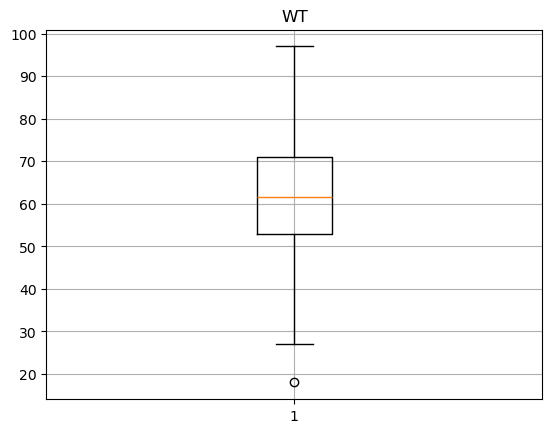

In [11]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()

In [12]:
Q1 = df['WT'].quantile(0.25)
Q3 = df['WT'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(26.0, 98.0)

In [13]:
df = df[~((df['WT']<lower) | (df['WT']>upper))]

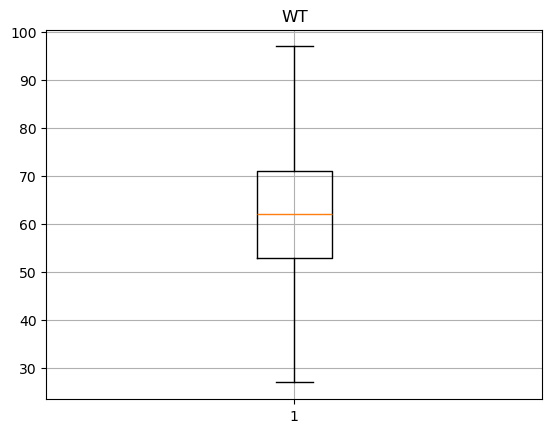

In [14]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()

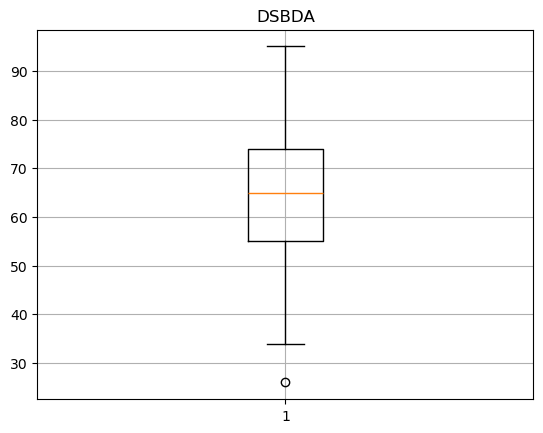

In [15]:
plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()

In [16]:
Q1 = df['DSBDA'].quantile(0.25)
Q3 = df['DSBDA'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(26.5, 102.5)

In [17]:
df = df[~((df['DSBDA']<lower) | (df['DSBDA']>upper))]

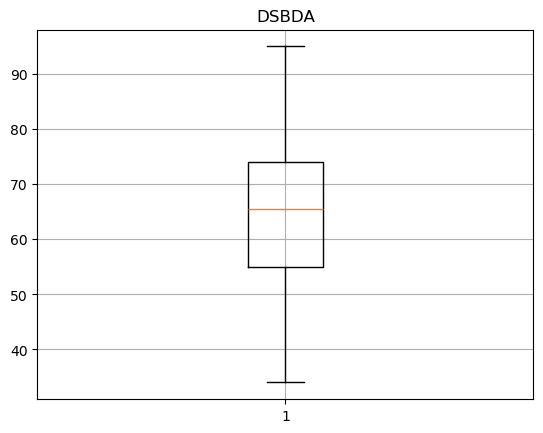

In [18]:
plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()

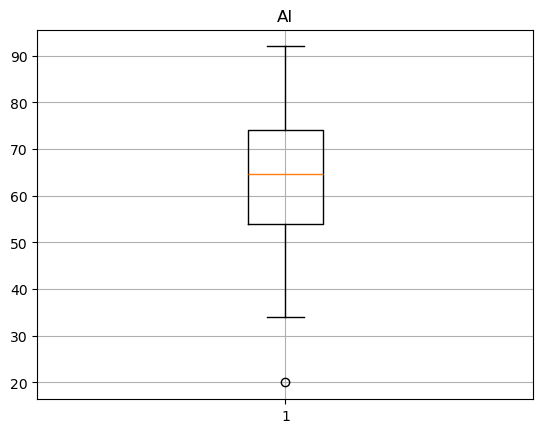

In [19]:
plt.boxplot(df['AI'])
plt.title('AI')
plt.grid(True)
plt.show()

In [20]:
Q1 = df['AI'].quantile(0.25)
Q3 = df['AI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(24.0, 104.0)

In [21]:
df = df[~((df['AI']<lower) | (df['AI']>upper))]

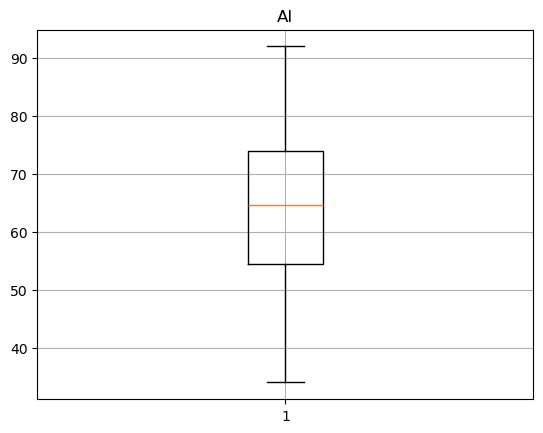

In [22]:
plt.boxplot(df['AI'])
plt.title('AI')
plt.grid(True)
plt.show()

In [23]:
df['AI'].skew(), df['DSBDA'].skew()


(-0.29290450930791145, -0.2369463400818316)

In [24]:
df['AI'].max(), df['AI'].mean()

(92.0, 63.693407202216065)

In [25]:

df['DSBDA'].max(), df['DSBDA'].mean()

(95.0, 65.55745152354571)

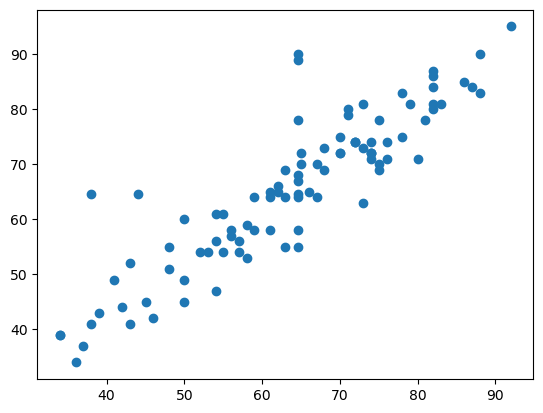

In [26]:
plt.scatter(x = df['AI'],y = df['DSBDA'])

In [27]:
df[['AI','DSBDA']].corr()


,AI,DSBDA
AI,1.000000,0.890192
DSBDA,0.890192,1.000000
